## Importing Modules and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.pyplot as plt 

from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('/Users/amandamortensen/Desktop/Data Analytics/Python Projects/Project 3 /Spotify_data.csv')

## Gaining a Deeper Understanding of the Dataset 

In [3]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [4]:
df.shape 

(520, 20)

In [5]:
df.info

<bound method DataFrame.info of        Age  Gender spotify_usage_period  \
0    20-35  Female    More than 2 years   
1    12-20    Male    More than 2 years   
2    35-60  Others   6 months to 1 year   
3    20-35  Female    1 year to 2 years   
4    20-35  Female    1 year to 2 years   
..     ...     ...                  ...   
515  20-35  Female    More than 2 years   
516  20-35  Female    More than 2 years   
517  20-35  Female    More than 2 years   
518  20-35  Female   6 months to 1 year   
519  20-35  Female    More than 2 years   

                             spotify_listening_device  \
0                  Smart speakers or voice assistants   
1                                  Computer or laptop   
2                  Smart speakers or voice assistants   
3      Smartphone, Smart speakers or voice assistants   
4                                          Smartphone   
..                                                ...   
515  Smartphone, Computer or laptop, Wearable device

In [6]:
df.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [7]:
df.dtypes


Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [8]:
df.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [9]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Length: 520, dtype: bool


In [10]:
df.loc[df.duplicated()]

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
194,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,"While Traveling, leisure time",recommendations,4,Never,None,None,None,None,Ok


In [11]:
df.loc[df.duplicated()]

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
194,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,"While Traveling, leisure time",recommendations,4,Never,None,None,None,None,Ok


## Explorative Data Analysis 

In [12]:
# Spotify User Data Analysis

In [13]:
df['Age'].unique()

array(['20-35', '12-20', '35-60', '6-12', '60+'], dtype=object)

Text(0, 0.5, 'Count')

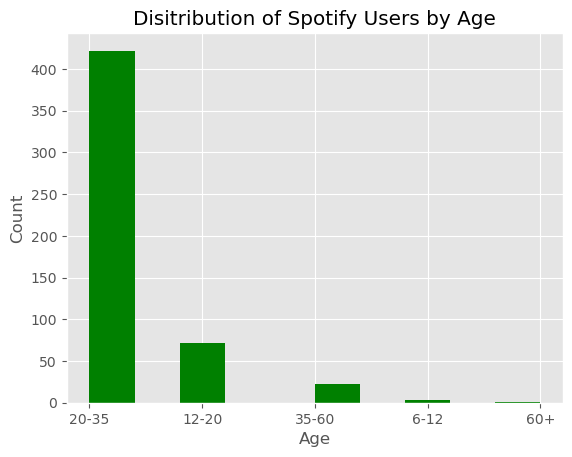

In [14]:
plt.hist(df.Age, color='Green')
plt.show 
plt.title('Disitribution of Spotify Users by Age')
plt.xlabel('Age')
plt.ylabel('Count')

In [15]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

Text(0.5, 1.0, 'Distribution of Spotify Users by Gender')

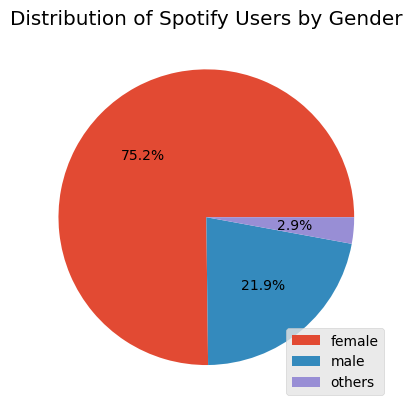

In [16]:
x = df['Gender'].value_counts()
plt.pie(x,autopct= '%1.1f%%')
plt.show 
labels = ['female', 'male', 'others']
plt.legend(labels)
plt.show
plt.title('Distribution of Spotify Users by Gender')




Text(0, 0.5, 'Count')

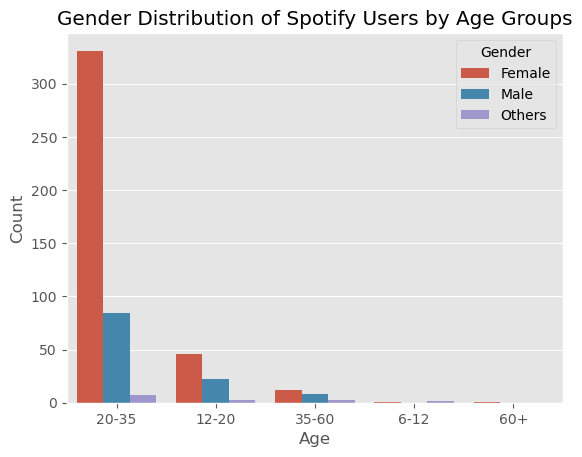

In [17]:
sns.countplot(x='Age', data=df, hue = 'Gender').set(title ='Gender Distribution of Spotify Users by Age Groups')
plt.ylabel('Count')

In [18]:
#Spotify Usage Period Analysis 

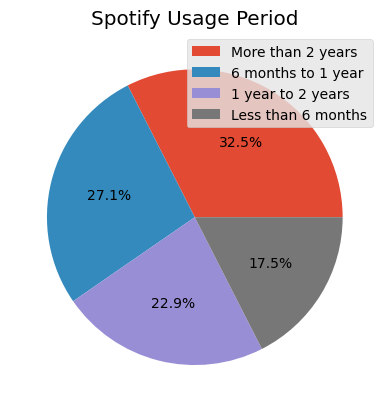

In [19]:
x = df['spotify_usage_period'].value_counts()
plt.pie(x, autopct = '%1.1f%%')
plt.title('Spotify Usage Period')
labels = ['More than 2 years' ,'6 months to 1 year', '1 year to 2 years', 'Less than 6 months']
plt.legend(labels, loc='upper right')
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'More than 2 years'),
  Text(1, 0, '6 months to 1 year'),
  Text(2, 0, '1 year to 2 years'),
  Text(3, 0, 'Less than 6 months')])

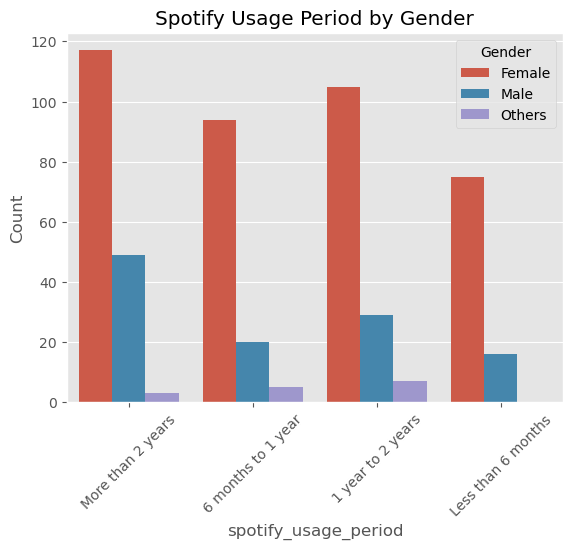

In [20]:
sns.countplot(x='spotify_usage_period', data=df, hue = 'Gender').set(title = 'Spotify Usage Period by Gender')
plt.ylabel('Count')
plt.xticks(rotation = 45) 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'More than 2 years'),
  Text(1, 0, '6 months to 1 year'),
  Text(2, 0, '1 year to 2 years'),
  Text(3, 0, 'Less than 6 months')])

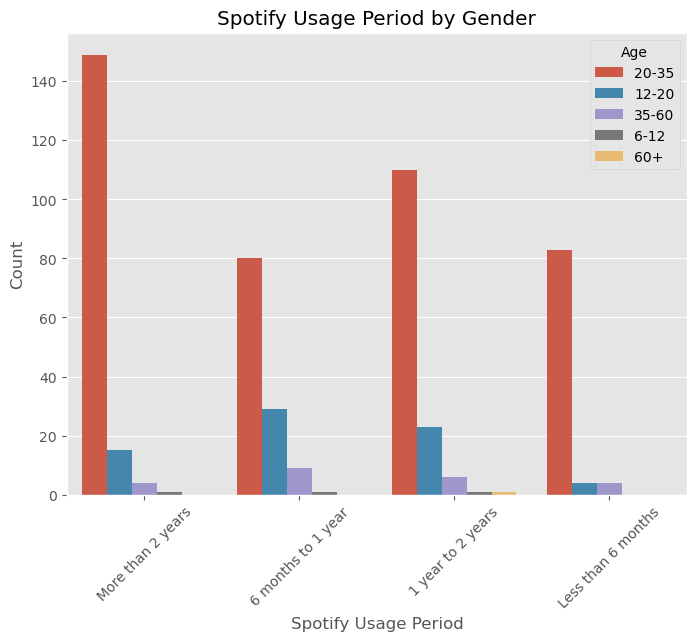

In [21]:
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(x = 'spotify_usage_period', data=df, hue = 'Age').set(title = 'Spotify Usage Period by Gender')
plt.xlabel('Spotify Usage Period')
plt.ylabel('Count')
plt.xticks(rotation = 45) 

In [22]:
#Prefered Listening Device 

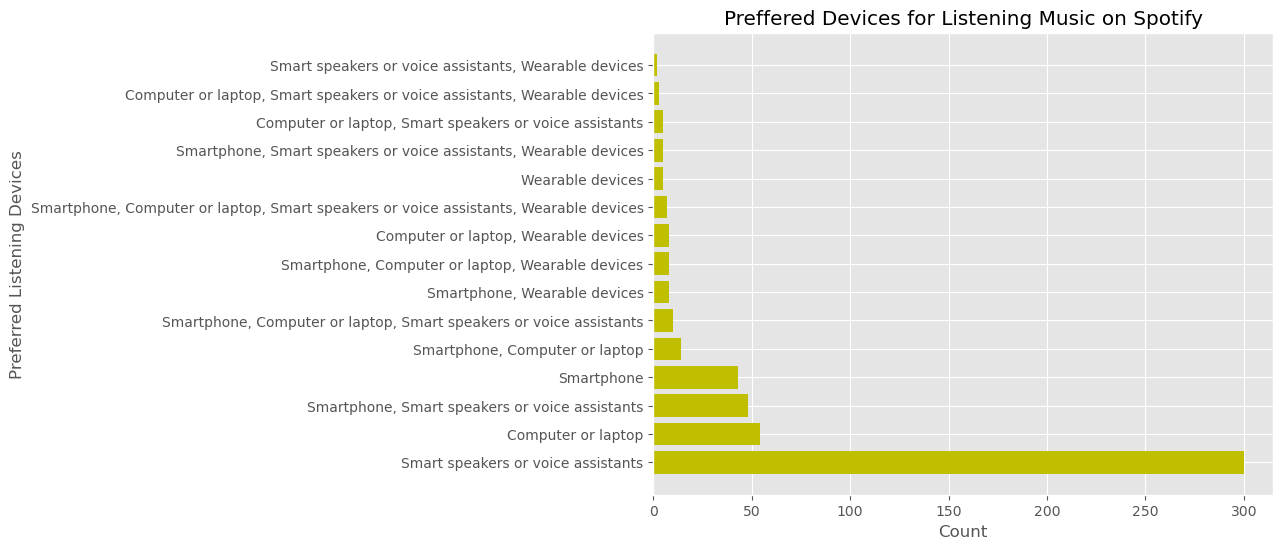

In [23]:
fig,ax=plt.subplots(figsize=(8,6))
y=df['spotify_listening_device'].value_counts().values
x=df['spotify_listening_device'].unique()
plt.barh(x,y,color='y')
plt.xlabel('Count')
plt.ylabel('Preferred Listening Devices')
plt.title('Preffered Devices for Listening Music on Spotify')
plt.show()

In [24]:
# Spotify Subscription Plan Analysis 

In [25]:
df['spotify_subscription_plan'].value_counts()

Free (ad-supported)            424
Premium (paid subscription)     96
Name: spotify_subscription_plan, dtype: int64

Text(0, 0.5, 'Count')

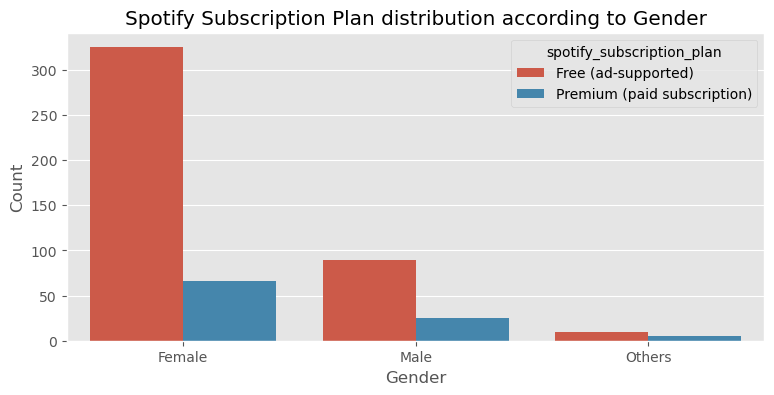

In [26]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Gender',data=df,hue='spotify_subscription_plan').set(title="Spotify Subscription Plan distribution according to Gender")
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

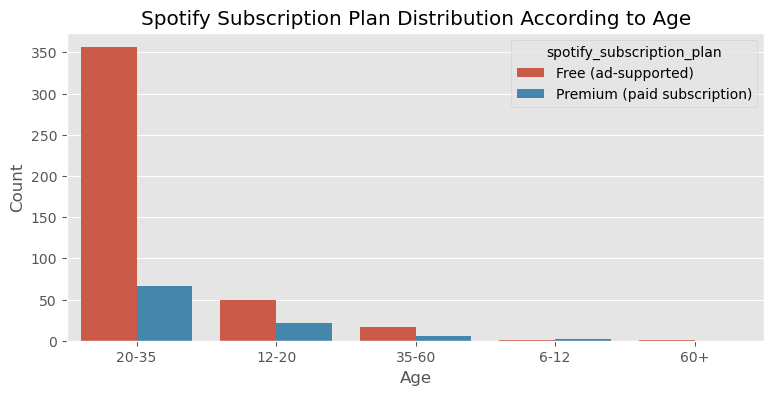

In [27]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Age',data=df,hue='spotify_subscription_plan').set(title="Spotify Subscription Plan Distribution According to Age")
plt.xlabel('Age')
plt.ylabel('Count')

In [28]:
x = df['premium_sub_willingness'].value_counts()


<function matplotlib.pyplot.show(close=None, block=None)>

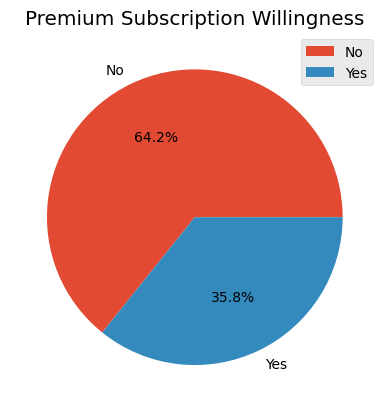

In [29]:
labels = ['No', 'Yes']
plt.pie(x,labels=labels, autopct='%1.1f%%')
plt.legend(loc='best')
plt.title('Premium Subscription Willingness')
plt.show

Text(0, 0.5, 'Count')

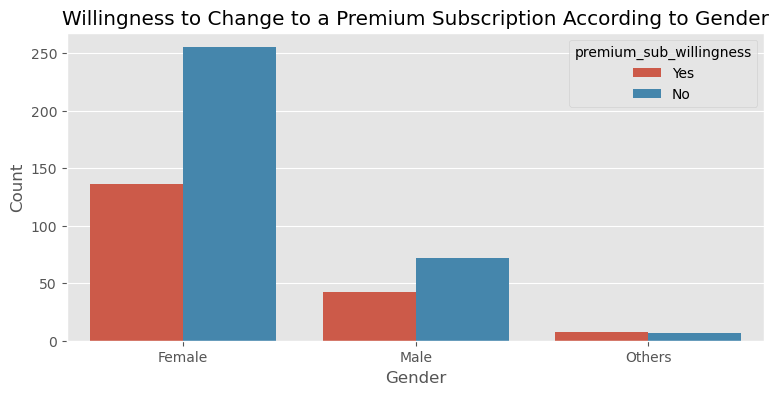

In [30]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Gender', data=df, hue='premium_sub_willingness').set(title='Willingness to Change to a Premium Subscription According to Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

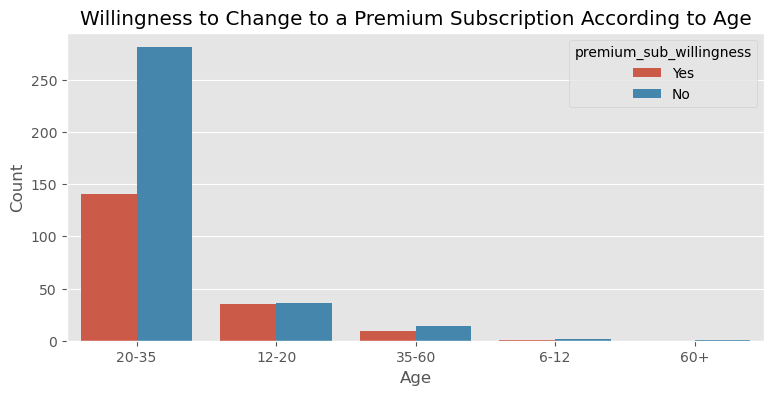

In [31]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Age', data=df, hue='premium_sub_willingness').set(title='Willingness to Change to a Premium Subscription According to Age')
plt.ylabel('Count')

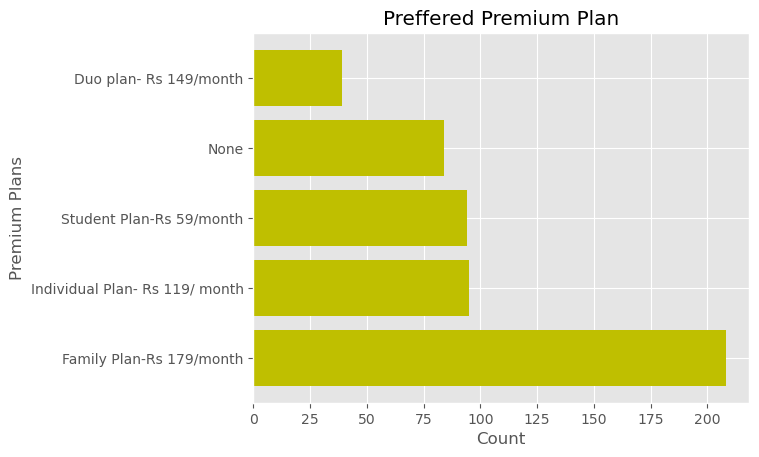

In [32]:
x=df['preffered_premium_plan'].unique()
y=df['preffered_premium_plan'].value_counts().values
plt.barh(x,y,color='y')
plt.xlabel('Count')
plt.ylabel('Premium Plans')
plt.title('Preffered Premium Plan')
plt.show()

In [33]:
# Analysis of Spotify Users' Listening Habits 

In [34]:
x = df['preferred_listening_content'].value_counts()
x


Music      410
Podcast    110
Name: preferred_listening_content, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

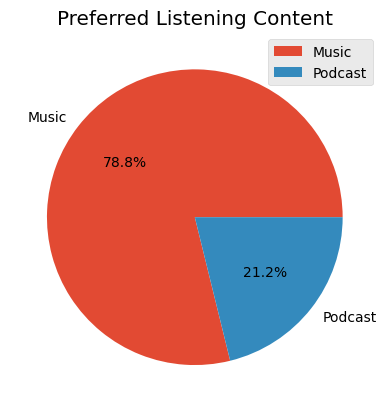

In [35]:
labels = ['Music', 'Podcast']
plt.pie(x,labels=labels, autopct='%1.1f%%')
plt.legend(loc='best')
plt.title('Preferred Listening Content')
plt.show


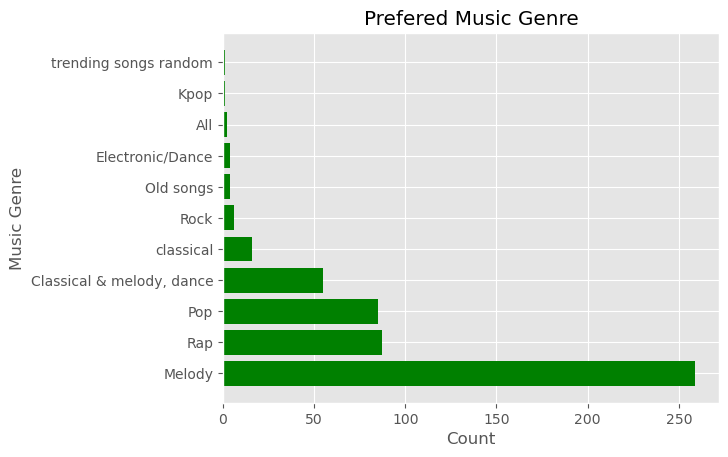

In [36]:
x=df['fav_music_genre'].unique()
y=df['fav_music_genre'].value_counts().values
plt.barh(x,y,color='g')
plt.title('Prefered Music Genre')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.show()


In [37]:
x = df['music_time_slot'].value_counts()
x

Night        312
Afternoon    117
Morning       91
Name: music_time_slot, dtype: int64

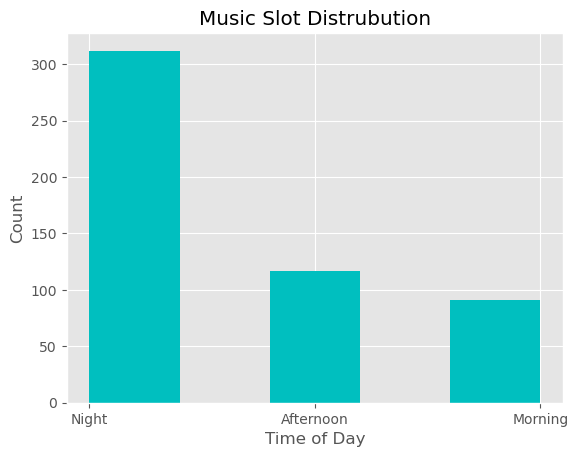

In [38]:
plt.hist(df.music_time_slot,bins=5, color='c')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Music Slot Distrubution')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

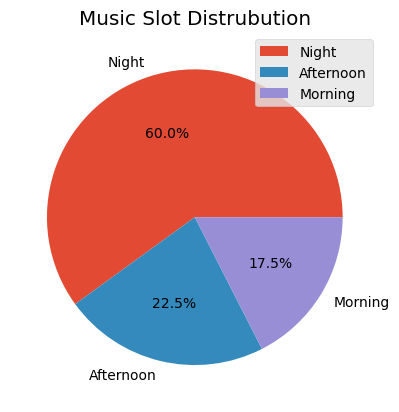

In [39]:
labels = ['Night', 'Afternoon', 'Morning']
plt.pie(x,labels=labels, autopct='%1.1f%%')
plt.legend(loc='best')
plt.title('Music Slot Distrubution')
plt.show

Text(0, 0.5, 'Count')

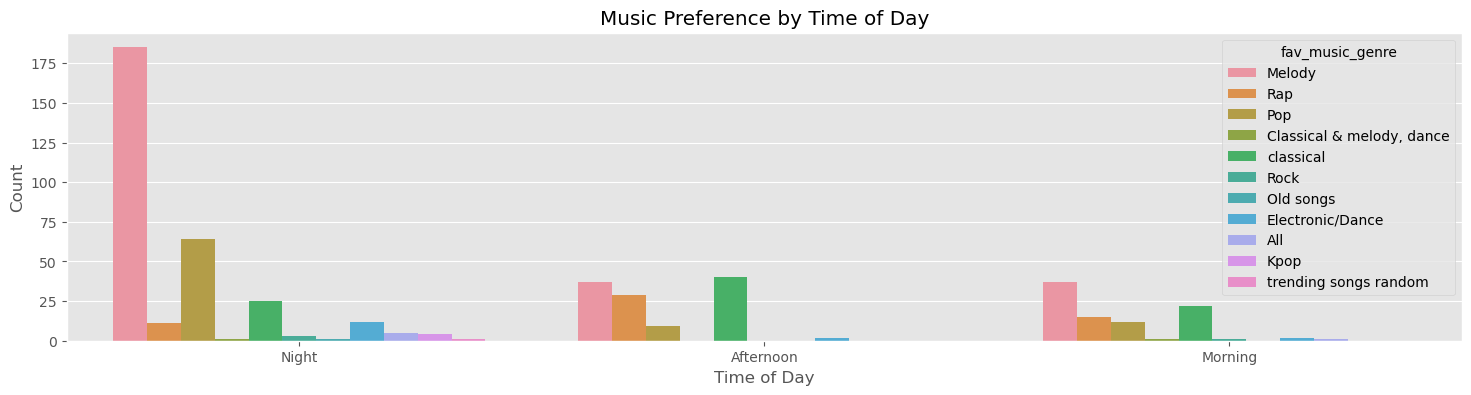

In [40]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x='music_time_slot', data=df, hue='fav_music_genre').set(title="Music Preference by Time of Day")
plt.xlabel('Time of Day')
plt.ylabel('Count')

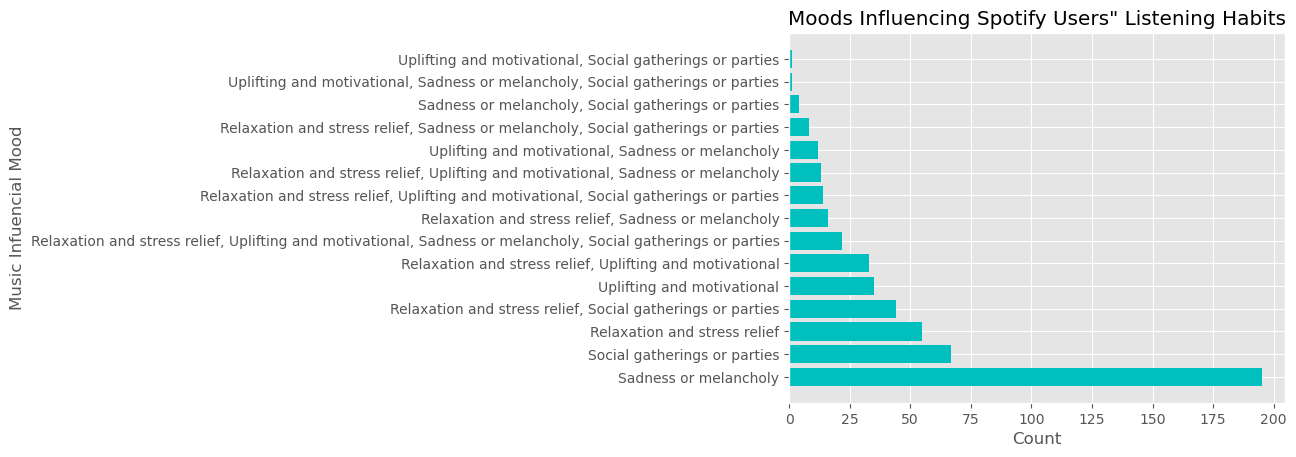

In [41]:

x=df['music_Influencial_mood'].unique()
y=df['music_Influencial_mood'].value_counts().values
plt.barh(x,y,color='c')
plt.title('Moods Influencing Spotify Users" Listening Habits')
plt.xlabel('Count')
plt.ylabel('Music Infuencial Mood')
plt.show()



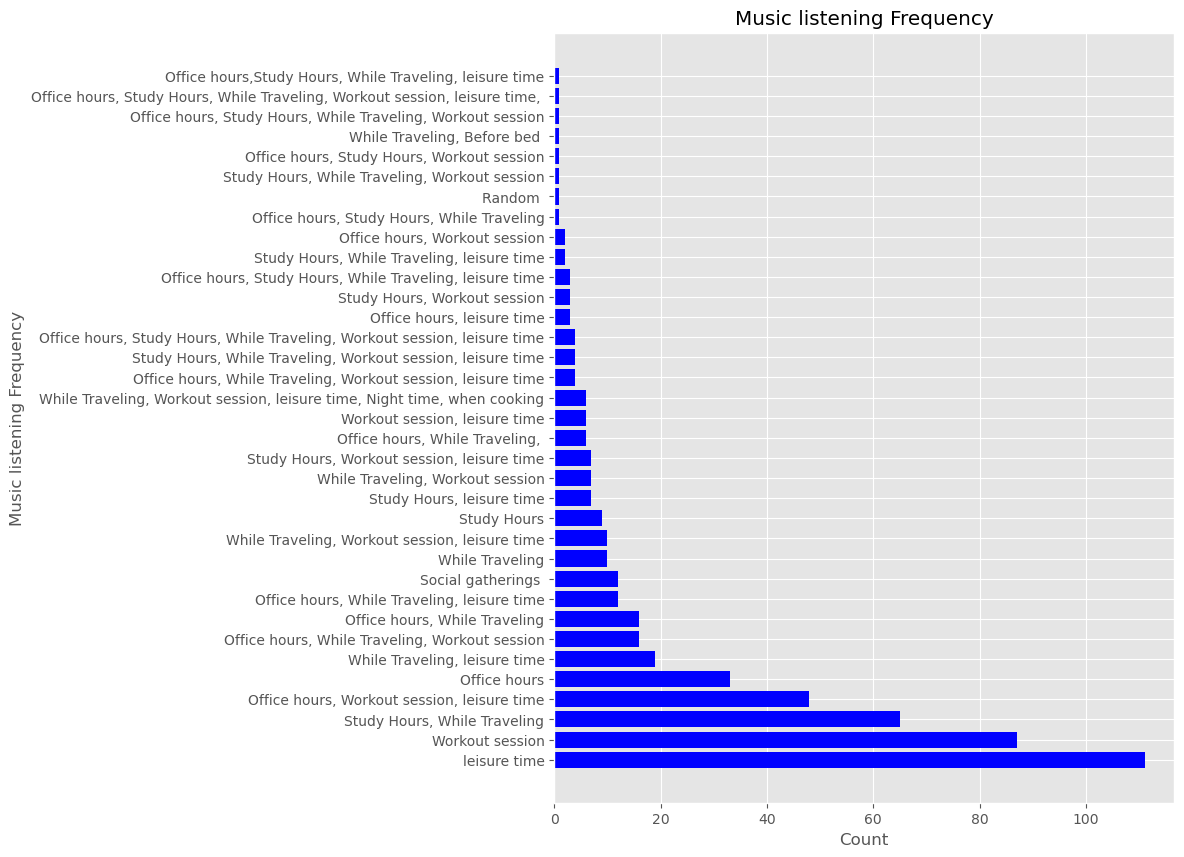

In [42]:
fig,ax=plt.subplots(figsize=(8,10))
x=df['music_lis_frequency'].unique()
y=df['music_lis_frequency'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Music listening Frequency')
plt.title('Music listening Frequency')
plt.show()

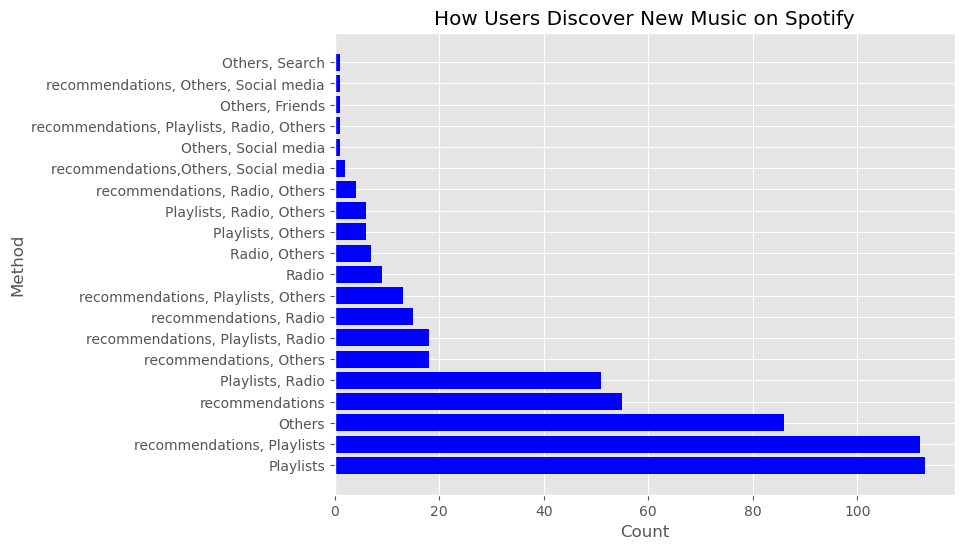

In [43]:
fig,ax=plt.subplots(figsize=(8,6))
x=df['music_expl_method'].unique()
y=df['music_expl_method'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Method')
plt.title('How Users Discover New Music on Spotify')
plt.show()

In [44]:
# Rating of Music Recommendations 

Text(0.5, 1.0, 'Distrubution of how Users Rate the Spotify Music Recommendations')

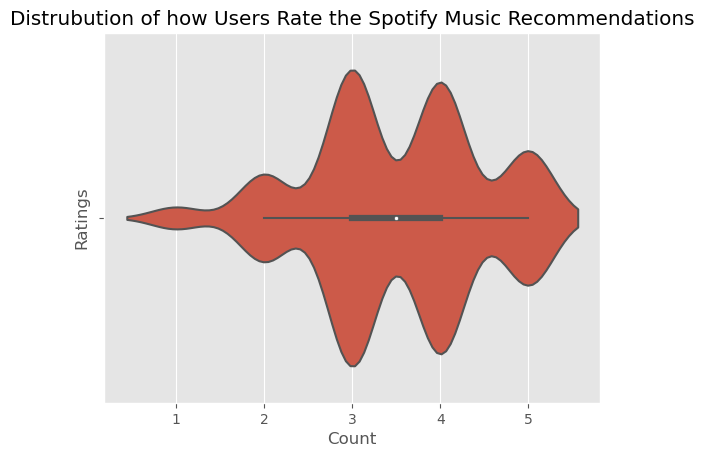

In [46]:
sns.violinplot(x=df["music_recc_rating"])
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('Distrubution of how Users Rate the Spotify Music Recommendations')

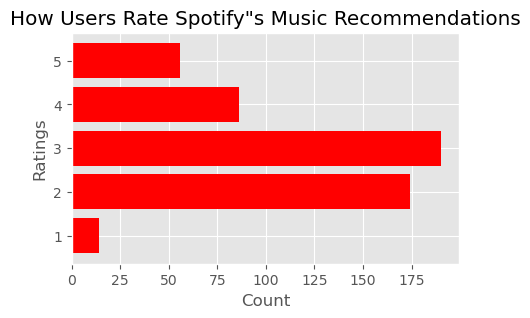

In [45]:
fig,ax=plt.subplots(figsize=(5,3))
x=df['music_recc_rating'].unique()
y=df['music_recc_rating'].value_counts().values
plt.barh(x,y,color='red')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('How Users Rate Spotify"s Music Recommendations')
plt.show()

Text(0.5, 0, 'Music Recommendation Rating')

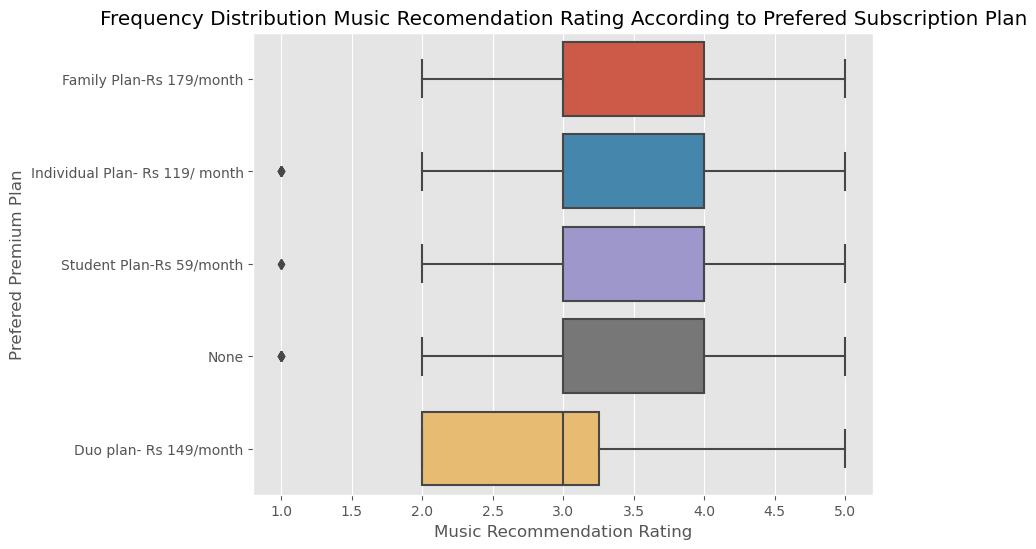

In [70]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x="music_recc_rating", y="preffered_premium_plan").set(title='Frequency Distribution Music Recomendation Rating According to Prefered Subscription Plan')
plt.ylabel('Prefered Premium Plan')
plt.xlabel('Music Recommendation Rating')

In [47]:
#Podcast Listening Frequenccy 

In [48]:
x=df['pod_lis_frequency'].value_counts()
x

Rarely                  201
Never                   130
Once a week              91
Several times a week     78
Daily                    20
Name: pod_lis_frequency, dtype: int64

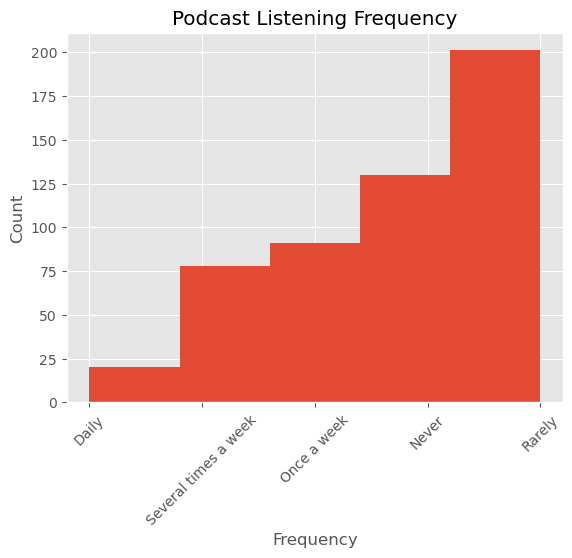

In [49]:
plt.hist(df.pod_lis_frequency,bins=5)
plt.xticks(rotation= 45)
plt.title('Podcast Listening Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()



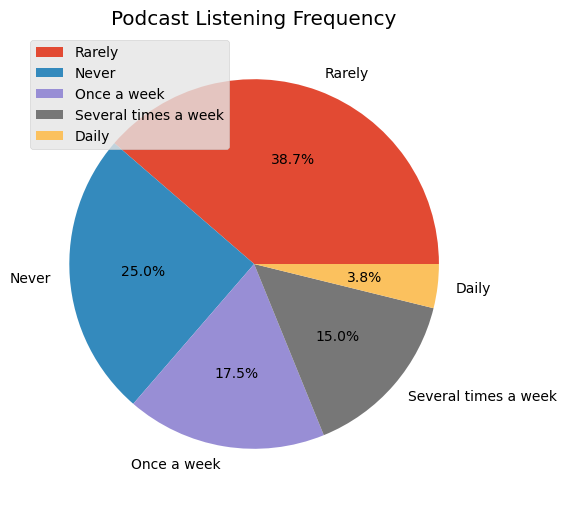

In [50]:
labels=['Rarely','Never','Once a week','Several times a week','Daily']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Podcast Listening Frequency')
plt.show()

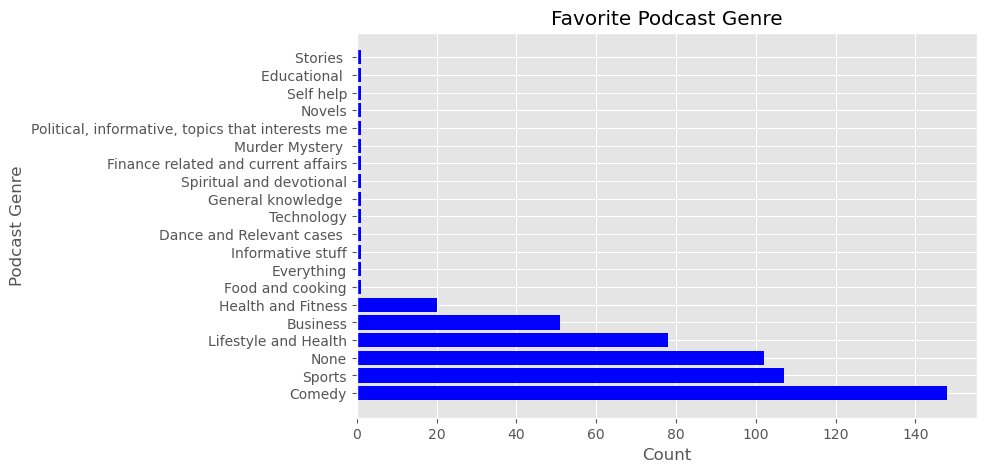

In [51]:
fig,ax=plt.subplots(figsize=(8,5))
x = df['fav_pod_genre'].unique()
y = df['fav_pod_genre'].value_counts().values 
plt.barh(x,y, color = 'b')
plt.xlabel('Count')
plt.ylabel('Podcast Genre')
plt.title('Favorite Podcast Genre')
plt.show()

In [52]:
x = df['preffered_pod_format'].value_counts()
x

Story telling     152
None              140
Conversational    105
Interview          74
Educational        49
Name: preffered_pod_format, dtype: int64

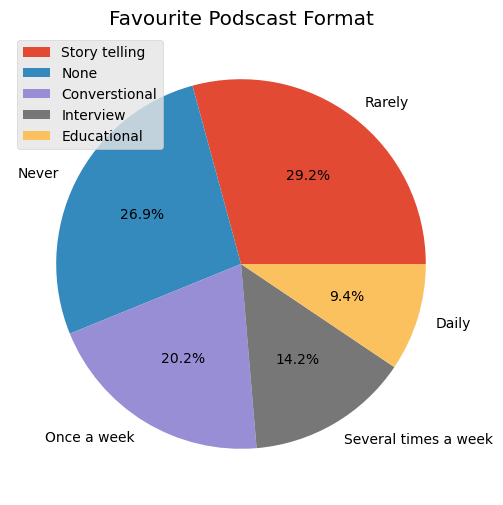

In [53]:
x = df['preffered_pod_format'].value_counts()
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.title('Favourite Podscast Format')
labels = ['Story telling', 'None','Converstional','Interview','Educational']
plt.legend(labels, loc='upper left')
plt.show()

In [54]:
x = df['preffered_pod_duration'].value_counts()
x

Shorter    191
None       129
Both       117
Longer      83
Name: preffered_pod_duration, dtype: int64

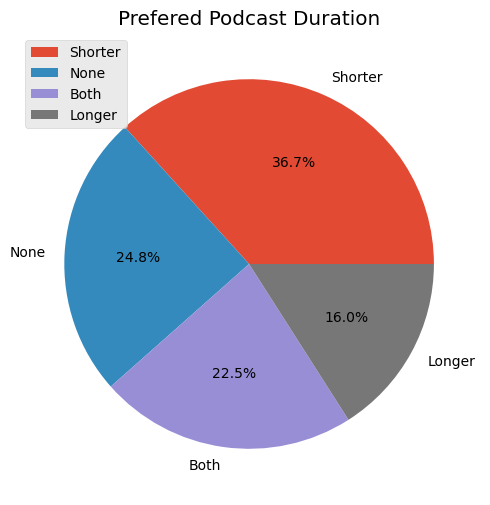

In [57]:
labels=['Shorter', 'None','Both', 'Longer']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(labels, loc='upper left')
plt.title('Prefered Podcast Duration')
plt.show()


In [60]:
x = df['pod_variety_satisfaction'].value_counts()
x

Ok                   280
Satisfied            162
Very Satisfied        48
Dissatisfied          20
Very Dissatisfied     10
Name: pod_variety_satisfaction, dtype: int64

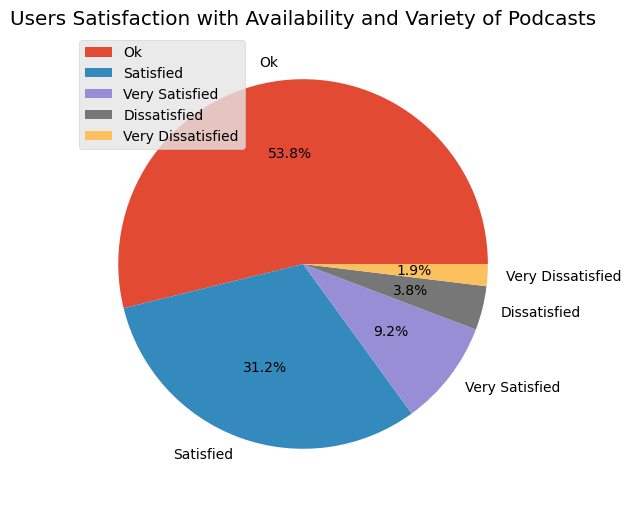

In [61]:
labels=['Ok', 'Satisfied','Very Satisfied', 'Dissatisfied','Very Dissatisfied']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(labels, loc='upper left')
plt.title('Users Satisfaction with Availability and Variety of Podcasts')
plt.show()
